In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
register_matplotlib_converters()

In [195]:
from scipy.signal import medfilt

In [190]:
big_df = None

In [191]:
locations = ["Sellingen", "Roodeschool", "Lochem", "Lauwersoog", "Hornhuizen", "DeZilk", "Boerakker"]

In [192]:
for location in locations:
    url = f"https://www.washetdonker.nl/data/Lochem/2020/01/20200110_120000_SQM-{location}.dat"
    df = pd.read_csv(f"https://www.washetdonker.nl/data/{location}/2020/01/20200110_120000_SQM-{location}.dat",
                     sep=";", comment="#",
                     names="UTC Date & Time, Local Date & Time, Temperature, Counts, Frequency, MSAS".split(", "))
    df["Location"] = location
    df["Local Date & Time"] = pd.to_datetime(df["Local Date & Time"])
    df["UTC Date & Time"] = pd.to_datetime(df["UTC Date & Time"], utc=True)
    if big_df is None:
        big_df = df
    else:
        big_df = big_df.append(df)

In [193]:
nice_locations = ["Sellingen", "Lochem", "Hornhuizen", "Boerakker"]

In [145]:
nice_locations = ["Hornhuizen"]

In [218]:
len(data)

1520

In [219]:
len(msas_data)

1515

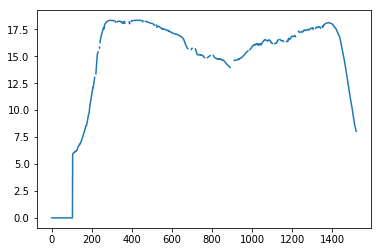

In [215]:
data = (big_df[big_df["Location"] == "Boerakker"])["MSAS"].values
data[np.abs(medfilt(data, 51)-data) > 0.1] = np.nan
plt.plot(data);

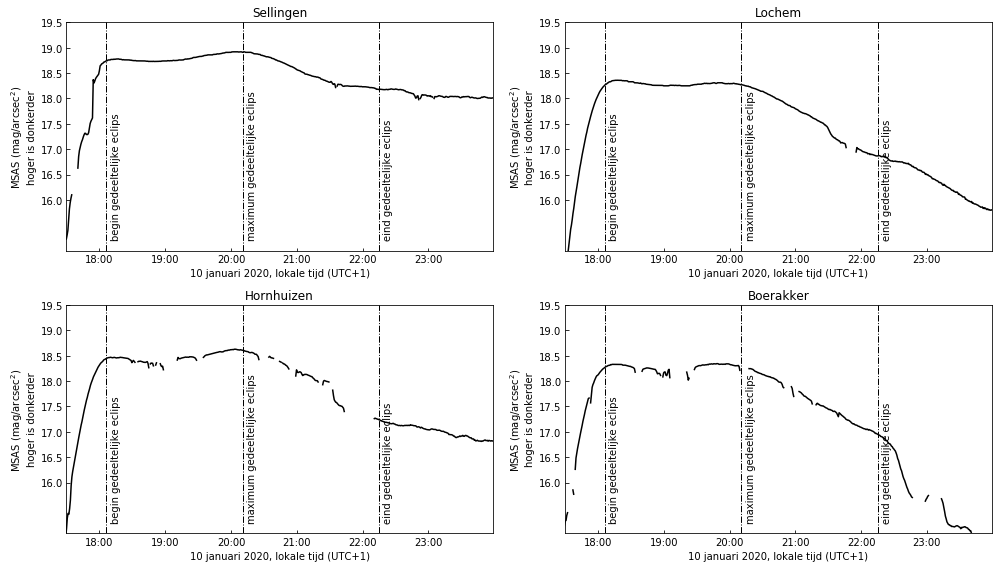

In [283]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

for axnum, location in enumerate(nice_locations):
    ax = axs[axnum//2, axnum%2]
    df = big_df[big_df["Location"] == location]
    msas_data = df["MSAS"].copy()
    
    # Remove outliers
    msas_data[np.abs(medfilt(msas_data, 51)-msas_data) > 0.1] = np.nan

    ax.plot(df["Local Date & Time"], msas_data, 'k');
    ax.tick_params(direction="in")

    ax.set_ylim((15, 19));
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax.set_xlim((datetime(2020,1,10,17,30), datetime(2020,1,10, 23, 59)));
    ax.set_xlabel("10 januari 2020, lokale tijd (UTC+1)")
    ax.set_ylabel("MSAS (mag/arcsec$^2$)\nhoger is donkerder");
    ax.set_yticks(np.arange(16, 20, 0.5))
    ax.set_title(location);
    ax.axvline(datetime(2020, 1, 10, 18, 6, 24), c='k', linestyle='-.', linewidth=1)
    ax.text(datetime(2020, 1, 10, 18, 10, 24), 15.2, 'begin gedeeltelijke eclips',
            rotation=90, verticalalignment='bottom')
    ax.axvline(datetime(2020, 1, 10, 20, 10, 39), c='k', linestyle='-.', linewidth=1)
    ax.text(datetime(2020, 1, 10, 20, 14, 39), 15.2, 'maximum gedeeltelijke eclips',
            rotation=90, verticalalignment='bottom')
    ax.axvline(datetime(2020, 1, 10, 22, 15, 0), c='k', linestyle='-.', linewidth=1)
    ax.text(datetime(2020, 1, 10, 22, 19, 0), 15.2, 'eind gedeeltelijke eclips',
            rotation=90, verticalalignment='bottom')
    
plt.tight_layout()